In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
97,12.03,1.50,Male,Yes,Fri,Dinner,2
195,7.56,1.44,Male,No,Thur,Lunch,2
126,8.52,1.48,Male,No,Thur,Lunch,2
22,15.77,2.23,Female,No,Sat,Dinner,2


In [6]:
tips.nlargest(5,'tip')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [11]:
(tips.tip / tips.total_bill).mean()

0.16080258172250478

In [8]:
(tips.tip / tips.total_bill).sort_values(ascending=False).head(10)

172    0.710345
178    0.416667
67     0.325733
232    0.291990
183    0.280535
109    0.279525
149    0.266312
93     0.263480
221    0.259314
51     0.252672
dtype: float64

In [4]:
tips.shape

(244, 7)

In [4]:
tips['total_bill'].sum()

4827.77

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [3]:
day_group = tips.groupby('day')

In [4]:
day_group.sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [9]:
day_group[['total_bill','tip']].sum()

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [11]:
tips.groupby('sex')[['total_bill','tip']].mean()

,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [8]:
tips['tip_per'] = tips['tip'] / tips['total_bill'] * 100

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [10]:
tips.groupby('sex')['tip_per'].mean()

sex
Male      15.765055
Female    16.649074
Name: tip_per, dtype: float64

In [16]:
tips.sort_values(by='tip_per', ascending=False).head()                 

,total_bill,tip,sex,smoker,day,time,size,tip_per
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


In [18]:
tips.groupby('day')[['total_bill','tip']].agg(['mean','sum','max'])

total_bill                       tip               
           mean      sum    max      mean     sum    max
day                                                     
Thur  17.682742  1096.33  43.11  2.771452  171.83   6.70
Fri   17.151579   325.88  40.17  2.734737   51.96   4.73
Sat   20.441379  1778.40  50.81  2.993103  260.40  10.00
Sun   21.410000  1627.16  48.17  3.255132  247.39   6.50

In [6]:
tips.groupby(['smoker','day'])[ ['total_bill','tip']].sum()

total_bill     tip
smoker day                     
Yes    Thur      326.24   51.51
       Fri       252.20   40.71
       Sat       893.62  120.77
       Sun       458.28   66.82
No     Thur      770.09  120.32
       Fri        73.68   11.25
       Sat       884.78  139.63
       Sun      1168.88  180.57

In [8]:
tips.groupby(['day','smoker','sex'])[['total_bill','tip']].agg(['sum','mean'])

total_bill                tip          
                          sum       mean     sum      mean
day  smoker sex                                           
Thur Yes    Male       191.71  19.171000   30.58  3.058000
            Female     134.53  19.218571   20.93  2.990000
     No     Male       369.73  18.486500   58.83  2.941500
            Female     400.36  16.014400   61.49  2.459600
Fri  Yes    Male       163.62  20.452500   21.93  2.741250
            Female      88.58  12.654286   18.78  2.682857
     No     Male        34.95  17.475000    5.00  2.500000
            Female      38.73  19.365000    6.25  3.125000
Sat  Yes    Male       589.62  21.837778   77.74  2.879259
            Female     304.00  20.266667   43.03  2.868667
     No     Male       637.73  19.929063  104.21  3.256563
            Female     247.05  19.003846   35.42  2.724615
Sun  Yes    Male       392.12  26.141333   52.82  3.521333
            Female      66.16  16.540000   14.00  3.500000
     No     Male       877.34  20.403256  133.96  3.115349
            Female     291.54  20.824286   46.61  3.329286

In [10]:
tips.groupby(['day','smoker'])['total_bill','tip'].agg({'total_bill' : 'sum','tip' : 'mean'})

<ipython-input-10-aa6c159f713f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby(['day','smoker'])['total_bill','tip'].agg({'total_bill' : 'sum','tip' : 'mean'})


total_bill       tip
day  smoker                      
Thur Yes         326.24  3.030000
     No          770.09  2.673778
Fri  Yes         252.20  2.714000
     No           73.68  2.812500
Sat  Yes         893.62  2.875476
     No          884.78  3.102889
Sun  Yes         458.28  3.516842
     No         1168.88  3.167895

In [4]:
day_groups = tips.groupby('day')

In [5]:
for day,rows in day_groups:
    print(day)
    print(rows.sort_values('total_bill', ascending=False).head(3))  # Top 3 transactions 

Thur
     total_bill   tip     sex smoker   day   time  size
197       43.11  5.00  Female    Yes  Thur  Lunch     4
142       41.19  5.00    Male     No  Thur  Lunch     5
85        34.83  5.17  Female     No  Thur  Lunch     4
Fri
    total_bill   tip   sex smoker  day    time  size
95       40.17  4.73  Male    Yes  Fri  Dinner     4
90       28.97  3.00  Male    Yes  Fri  Dinner     2
96       27.28  4.00  Male    Yes  Fri  Dinner     2
Sat
     total_bill    tip   sex smoker  day    time  size
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
59        48.27   6.73  Male     No  Sat  Dinner     4
Sun
     total_bill  tip   sex smoker  day    time  size
156       48.17  5.0  Male     No  Sun  Dinner     6
182       45.35  3.5  Male    Yes  Sun  Dinner     3
184       40.55  3.0  Male    Yes  Sun  Dinner     2


In [6]:
summary = tips.groupby(['day','time']).sum()

In [7]:
summary.index

MultiIndex([('Thur',  'Lunch'),
            ('Thur', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ( 'Fri', 'Dinner'),
            ( 'Sat',  'Lunch'),
            ( 'Sat', 'Dinner'),
            ( 'Sun',  'Lunch'),
            ( 'Sun', 'Dinner')],
           names=['day', 'time'])

In [8]:
summary

total_bill     tip   size
day  time                             
Thur Lunch      1077.55  168.83  150.0
     Dinner       18.78    3.00    2.0
Fri  Lunch        89.92   16.68   14.0
     Dinner      235.96   35.28   26.0
Sat  Lunch          NaN     NaN    NaN
     Dinner     1778.40  260.40  219.0
Sun  Lunch          NaN     NaN    NaN
     Dinner     1627.16  247.39  216.0

In [9]:
summary  = tips.groupby(['day','time'], as_index=False).sum()

In [10]:
summary

,day,time,total_bill,tip,size
0,Thur,Lunch,1077.55,168.83,150.0
1,Thur,Dinner,18.78,3.00,2.0
2,Fri,Lunch,89.92,16.68,14.0
3,Fri,Dinner,235.96,35.28,26.0
4,Sat,Lunch,NaN,NaN,NaN
5,Sat,Dinner,1778.40,260.40,219.0
6,Sun,Lunch,NaN,NaN,NaN
7,Sun,Dinner,1627.16,247.39,216.0


In [11]:
summary.loc[(summary.day == 'Fri') & (summary.time == 'Dinner'), 'total_bill']

3    235.96
Name: total_bill, dtype: float64

#### Pivot Table

In [12]:
tips.pivot_table(values = 'total_bill', index='day', columns='time')

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


In [13]:
tips.pivot_table(values = 'total_bill', index='day', columns='sex', aggfunc=['sum','mean'])

sum               mean           
sex      Male  Female       Male     Female
day                                        
Thur   561.44  534.89  18.714667  16.715312
Fri    198.57  127.31  19.857000  14.145556
Sat   1227.35  551.05  20.802542  19.680357
Sun   1269.46  357.70  21.887241  19.872222

In [14]:
tips.pivot_table(values = 'total_bill', index='day', columns=['time','smoker'], aggfunc='sum')

time     Lunch          Dinner         
smoker     Yes      No     Yes       No
day                                    
Thur    326.24  751.31     NaN    18.78
Fri      73.94   15.98  178.26    57.70
Sat        NaN     NaN  893.62   884.78
Sun        NaN     NaN  458.28  1168.88

In [12]:
# Margins is about summaries 
tips.pivot_table(values = 'total_bill', index='day', columns=['smoker'], aggfunc='sum', margins=True)

smoker,Yes,No,All
day,,,
Thur,326.24,770.09,1096.33
Fri,252.20,73.68,325.88
Sat,893.62,884.78,1778.40
Sun,458.28,1168.88,1627.16
All,1930.34,2897.43,4827.77


### get_dummies()

In [13]:
pd.get_dummies( tips[['smoker','day']])

,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
239,0,1,0,0,1,0
240,1,0,0,0,1,0
241,1,0,0,0,1,0
242,0,1,0,0,1,0


### Binning

In [14]:
tips['bill_bin'] = pd.cut(tips.total_bill,5)

In [15]:
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,"(12.618, 22.166]"
1,10.34,"(3.022, 12.618]"
2,21.01,"(12.618, 22.166]"
3,23.68,"(22.166, 31.714]"
4,24.59,"(22.166, 31.714]"
...,...,...
239,29.03,"(22.166, 31.714]"
240,27.18,"(22.166, 31.714]"
241,22.67,"(22.166, 31.714]"
242,17.82,"(12.618, 22.166]"


In [17]:
tips['bill_bin'] = pd.cut(tips.total_bill, bins=[0,10,30,50,100])
tips[['total_bill','bill_bin']].sample(5)

,total_bill,bill_bin
22,15.77,"(10, 30]"
17,16.29,"(10, 30]"
143,27.05,"(10, 30]"
147,11.87,"(10, 30]"
195,7.56,"(0, 10]"


In [10]:
tips['bill_bin'].value_counts()

(10, 30]     195
(30, 50]      31
(0, 10]       17
(50, 100]      1
Name: bill_bin, dtype: int64

In [18]:
tips['bill_bin'] = pd.cut(tips.total_bill,bins=[0,10,20,40,100],
                          labels=['Low','Medium','High','Very High'])
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,Medium
1,10.34,Medium
2,21.01,High
3,23.68,High
4,24.59,High
...,...,...
239,29.03,High
240,27.18,High
241,22.67,High
242,17.82,Medium


In [13]:
tips['bill_bin'].value_counts()

Medium       130
High          87
Low           17
Very High     10
Name: bill_bin, dtype: int64

In [19]:
pd.qcut(tips['total_bill'], [0,.25,.75,1], labels=['LQ','IQR','UQ'])

0      IQR
1       LQ
2      IQR
3      IQR
4       UQ
      ... 
239     UQ
240     UQ
241    IQR
242    IQR
243    IQR
Name: total_bill, Length: 244, dtype: category
Categories (3, object): ['LQ' < 'IQR' < 'UQ']

### Plotting 

<AxesSubplot:title={'center':'Total Bill By Day'}, xlabel='day', ylabel='Amount'>

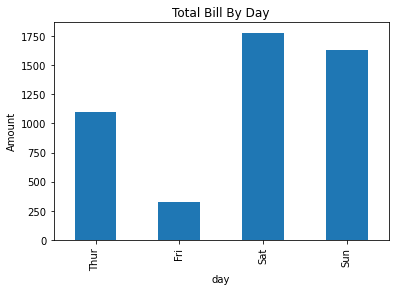

In [23]:
day_total = tips.groupby("day")['total_bill'].sum()
#print(day_total)
day_total.plot(kind='bar', ylabel = "Amount", title = "Total Bill By Day")

<AxesSubplot:ylabel='tip'>

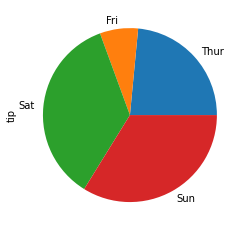

In [27]:
day_total = tips.groupby("day")['tip'].sum()
day_total.plot(kind = 'pie')

In [28]:
totals = tips.groupby(["day",'sex'])['total_bill'].sum()
totals

day   sex   
Thur  Male       561.44
      Female     534.89
Fri   Male       198.57
      Female     127.31
Sat   Male      1227.35
      Female     551.05
Sun   Male      1269.46
      Female     357.70
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='day,sex'>

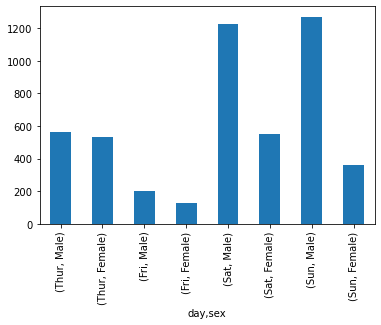

In [29]:
totals.plot.bar()

In [30]:
day_total = tips.pivot_table(index='day',columns='sex',values=['total_bill'],aggfunc='sum')

In [31]:
day_total

total_bill        
sex        Male  Female
day                    
Thur     561.44  534.89
Fri      198.57  127.31
Sat     1227.35  551.05
Sun     1269.46  357.70

In [33]:
day_total.columns = ['Male','Female']
day_total

,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


<AxesSubplot:xlabel='day'>

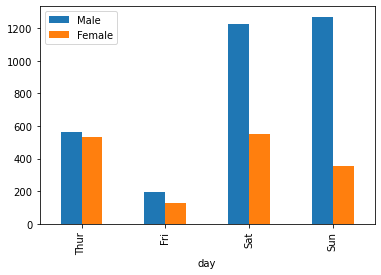

In [34]:
day_total.plot.bar()

<AxesSubplot:xlabel='sex'>

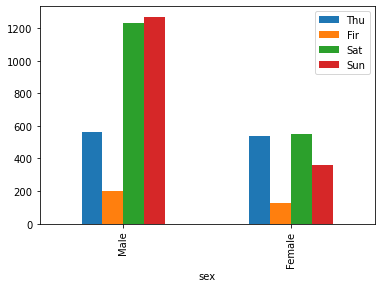

In [37]:
gender_total = tips.pivot_table(index='sex',columns='day',values=['total_bill'],aggfunc='sum')
gender_total.columns = ["Thu",'Fir','Sat','Sun']
gender_total.plot.bar()
#print(gender_total)